In [1]:
# importing the dependencies
import numpy as np
import pandas as pd

In [2]:
#loading dataset
frd_data=pd.read_csv(r"C:\Users\ACER\Downloads\Fraud.csv")

In [3]:
#printing datasets first 100 records
frd_data.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,0,0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0,0


In [4]:
#printing datasets last 100 records
frd_data.tail(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362520,735,TRANSFER,417103.68,C336307904,417103.68,0.0,C1155915285,0.00,0.00,1,0
6362521,735,CASH_OUT,417103.68,C1450763584,417103.68,0.0,C1377830519,34232.06,451335.75,1,0
6362522,735,TRANSFER,92735.71,C1351323617,92735.71,0.0,C413722554,0.00,0.00,1,0
6362523,735,CASH_OUT,92735.71,C786761311,92735.71,0.0,C570188819,921583.30,1014319.01,1,0
6362524,735,TRANSFER,123146.28,C1625883009,123146.28,0.0,C918154390,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [5]:
# dataset information
frd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
#checking missing values in each column
frd_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# this is a large dataset with no null values

In [7]:
#checking distribution of fraud and flagged fraud transaction
frd_data['isFraud'].value_counts()
frd_data['isFlaggedFraud'].value_counts()


isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [8]:
# segregating data for analysis
legit=len(frd_data[frd_data.isFraud==0])
fraud=len(frd_data[frd_data.isFraud==1])

In [9]:
print(" number of legit transactions= ", legit)
print(" number of fraud transactions= ", fraud)

 number of legit transactions=  6354407
 number of fraud transactions=  8213


In [10]:
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print ("Percentage of Legit transactions: ",legit_percent)
print ("Percentage of Legit transactions: ",fraud_percent)

Percentage of Legit transactions:  99.87091795518198
Percentage of Legit transactions:  0.12908204481801522


# the data seems unbalanced,there are only 8213 frauds and 6354407 secure transctions 

# Given the percentage, random forests and descision trees would be suited

In [11]:
#viewing the merchants
x = frd_data[frd_data['nameDest'].str.contains('M')]
x.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


# oldbalanceDest and newbalanceDest abtributes are missing

In [12]:
#viewing the data
import seaborn as sns
import matplotlib.pyplot as plt

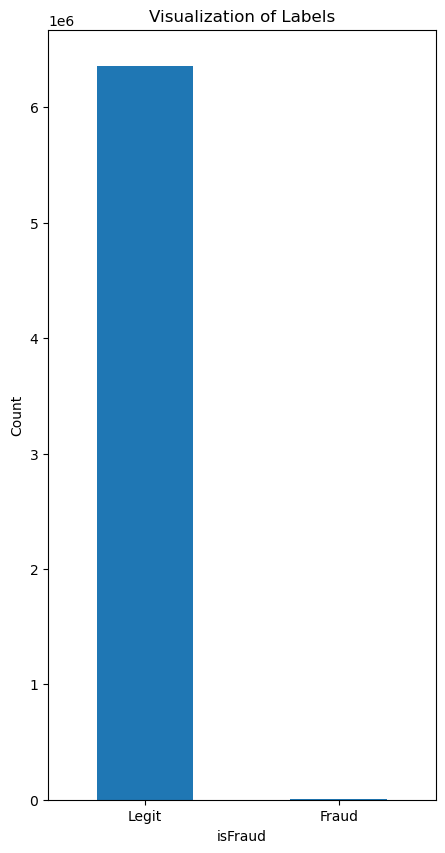

In [13]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = frd_data.value_counts(frd_data['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

# training and testing

In [14]:
#making a copy of dataset and viewing first 10 values
new_data=frd_data.copy()
new_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [15]:
#Checking dtype attributes- object
listofobj=new_data.select_dtypes(include="object").columns
print(listofobj)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


# these three need encoding for multicolinearity

In [16]:
#Label Encoding for object 
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()

for feat in listofobj:
    new_data[feat] = lenc.fit_transform(new_data[feat].astype(str))

print (new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [17]:
new_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.0,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.0,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.0,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.0,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.0,0.00,0,0
5,1,3,7817.71,6026525,53860.00,46042.29,2247218,0.0,0.00,0,0
6,1,3,7107.77,1805947,183195.00,176087.23,2063363,0.0,0.00,0,0
7,1,3,7861.64,2999171,176087.23,168225.59,2314008,0.0,0.00,0,0
8,1,3,4024.36,869140,2671.00,0.00,768940,0.0,0.00,0,0
9,1,2,5337.77,5407276,41720.00,36382.23,282960,41898.0,40348.79,0,0


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_cal(frd_data):
    vif_cal = pd.DataFrame()
    vif_cal["variables"] = frd_data.columns
    vif_cal["VIF"] = [variance_inflation_factor(frd_data.values, i) 
                      for i in range(frd_data.shape[1])]

    return(vif_cal)

vif_cal(new_data)

KeyboardInterrupt: 

# oldbalanceOrg and newbalanceOrig have high VIF.They are highly correlated.  oldbalanceDest and newbalanceDest are connected as are nameDest and nameOrig.

# We cancombine these collinear attribute pairs and drop the individual ones.

<Axes: >

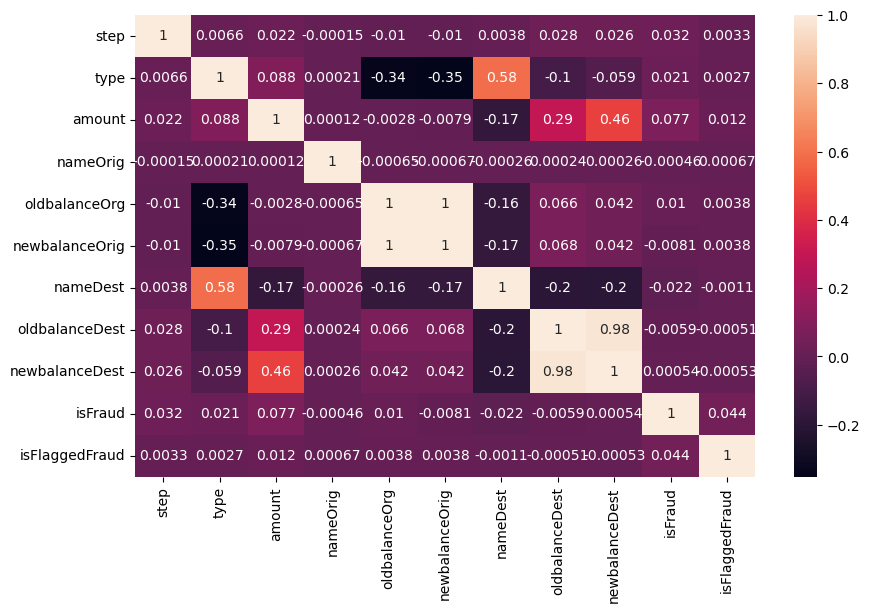

In [19]:
# creating a heatmap visual
corr=new_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

# The VIF values and correlation heatmap allow us to see if there are attributes that are highly correlated.  The less correlated to the isFraud Attribute can be dropped.

In [20]:
#importing dependencies
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [21]:
#scaling while tryin to keep up with accuracy of model
sclr=StandardScaler()
new_data["NormalizedAmount"] = sclr.fit_transform(new_data["amount"].values.reshape(-1, 1))
new_data.drop(['amount'], inplace= True, axis= 1)
Y = new_data["isFraud"]
X = new_data.drop(["isFraud"], axis= 1)

In [22]:
# Splitting the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 10)
Shape of X_test:  (1908786, 10)


In [23]:
#descision tree model training
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.96709950722605


In [28]:
#random foest model training
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100
print("Random Forest Score: ", random_forest_score)

KeyboardInterrupt: 

In [26]:
#confusion matrix creation
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 2108
False Positives: 301
True Negatives: 1906050
False Negatives: 327


In [30]:
# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


TP,FP,TN,FN - Random Forest


NameError: name 'Y_pred_rf' is not defined

In [29]:
# confusion matrix - DTconfusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

Confusion Matrix - Decision Tree


NameError: name 'confusion_matrix_dt' is not defined

In [ ]:
# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

The models seem accurate.
In a fraud detection model, precision is important because rather than predicting normal transactions correctly since we want Fraud transactions to be predicted correctly and Legit transactions to be spared.
Thus, Random Forest and Decision Tree are used unstead of other algorithms.


This model has been chosen because because of the unbalanced dataset (Legit: Fraud :: 99.87:0.13). 
Random forest makes multiple decision trees which makes it easier to understand the data in a simpler way.
Decision Tree makes decisions in a boolean way.


# Key factors that predict fraudulent customer can be

The source type of request being secure or not.
Name of organisation asking for money is legit or not. 
Transaction history of vendors and more.

# Prevention steps to be adopted can include

Use smart vertification methods in apps.
Using secured websites.
Use secured internet connections.
Keep the device(mobile and laptop) security updated.
Not responding to or blocking and reporting unsolicited calls/messages/E-mails.


# Implementation can be determined by

Bank sending frequent E-statements.
Customers keeping a track of their account activity.
Keeping a suitable log of payments made.